<a href="https://colab.research.google.com/github/SebastiaanBekker/practical_python_101/blob/master/Les8_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## notebook: https://tinyurl.com/4tb99raf


## Intro
Dit is een korte versie van het notebook van Alexis Cook,  https://www.kaggle.com/code/alexisbcook/titanic-tutorial/notebook, die een goede uitleg geeft van een van de startpunten voor Kaggle.

Doel is om te zien hoe je met data omgaat en een paar voorbeelden van modellen te geven.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Machine learning
- Patronen herkennen in data om te voorspellen of beslissingen te nemen.

Groot deel van tijd en werk zit in de data...

Deze case laat op kleine schaal zien wat je tegenkomt en hoe keuzes je resultaat beinvloeden.

## Kaggle

Dit is een van de grootste sites met datasets, tutorials en wedstrijden op het gebied van data en data science.

Goede plek om te beginnen!

Ga naar de site en scrhijf je in voor de competitie voor Titanic. Dit is de set waar de meeste mensen mee beginnen: https://www.kaggle.com/c/titanic

De structuur is die van de meeste projecten in Kaggle:

- **overview** laat zien waar het over gaat, wat je moet doen en hoe je score berekend wordt. Ook staat er hoe je je inzending moet indienen. Goed om even door te nemen voor je begint, dat scheelt een hoop werk later.
-**Data** is precies dat en is in een data science project goed om even door te kijken, maar het meeste van een set lee je toch door aan de slag te gaan.
- Zeker bij tutorials kun je onder Code veel tips en handige code vinden.

De eerste stap is het laden van de data. Als je Kaggle gebruikt, dan zit er een knop om een notebook te maken vanuit de competitie. Dit scheelt tijd en moeite. Veel werkt zoals dit notebook: losse cellen waar je veel mee kan.

Je kunt deze link volgen om de dataset via de api te downloaden. Kost even tijd met een key, maar handig als je vaker aan de slag wil: https://github.com/Kaggle/kaggle-api en hier wat meer uitleg: https://www.kaggle.com/general/74235

Anders kun je de set downloaden op je computer.

Pak de bestanden uit.
Daarna heb je twee opties:
- je drive koppelen
- de files uploaden. (dan werken de files totdat je het notebook sluit of stopt)


Als je de datasets hebt, kunnen we verder. In totaal zijn het drie sets: test.csv, train.csv, gender_submission.csv


In [ ]:
import pandas as pd

# Pandas
Dit is een van de meest gebruikte tools voor data. Zie het als een soort excel voor data. Je maakt tabellen (dataframes of df's) en kunt veel inzichten, berekeningen etc. doen

In [ ]:
train_data = pd.read_csv("./train.csv")
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
test_data = pd.read_csv("./test.csv")
test_data.head() # Head laat de eerste regels van het df zien.


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## De data:

- Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - man/vrouw
- Age - leeftijd
- Sibsp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin >> Mist 80% van de tijd
- Embarked - inscheep haven (C = Cherbourg; Q = Queenstown; S = Southampton)



In [ ]:
test_data.info() #Dit commando geeft veel informatie over de inhoud van de data. Vooral null/non null is handig om te weten.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Data verkennen

Het is vaak handig om een gevoel te krijgen voor de data. Daarmee kun je sneller naar modellen kijken en toetsen wat je kan verwachten. Hieronder een snel voorbeeld van het % vrouwen dat de ramp overleefde.

In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = round(sum(women)/len(women)*100,2)

print(f"women who survived = {rate_women}%")


women who survived = 74.2%


In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = round(sum(men)/len(men)*100,2)

print(f"men who survived = {rate_men}%")

men who survived = 18.89%


Dus man/vrouw verdeling geeft je al een redelijk goede voorspelling

## Hoe nu verder?

Een beslisboom is in dit soort gevallen best handig. Op basis van de waarden in de tabel maak je een keuze (of python doet dat voor je ;-))

Elke keer ga je een tak dieper. Makkelijk te volgen/snappen. mar man of vrouw verklaart niet alles bijvoorbeeld, dus vaak te 'simpel' op zich.



In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer


# Lege waarden
Vaak moet je keuzes maken over lege waarden in je df. Zoals hierboven al te zien was, is dat bij sommige kolommen het geval bij veel rijen.

Een ander voorbeeld is een d met film ratings. niet alles is door iedereen ingevuld.

Wat doe je dan? Dat hangt er echt vanaf en is vaak overleggen/puzzelen/....

Hieronder wat voorbeelden

In [ ]:

# Drop the 'Cabin' column
train_data = train_data.drop('Cabin', axis=1) # Cabin gebruiken we niet
test_data = test_data.drop('Cabin', axis=1)

# Fill missing values in 'Age' with its median
age_imputer = SimpleImputer(strategy='median') # Gemiddelde leeftijd dus
train_data['Age'] = age_imputer.fit_transform(train_data['Age'].values.reshape(-1, 1))
test_data['Age'] = age_imputer.transform(test_data['Age'].values.reshape(-1, 1))

# Fill missing values in 'Embarked' with its most common value
embarked_imputer = SimpleImputer(strategy='most_frequent') # Wat het meest vaak voorkomt.
train_data['Embarked'] = embarked_imputer.fit_transform(train_data['Embarked'].values.reshape(-1, 1))
test_data['Embarked'] = embarked_imputer.transform(test_data['Embarked'].values.reshape(-1, 1))

# Fare moet ook geuvld worden
fare_imputer = SimpleImputer(strategy='median')
train_data['Fare'] = fare_imputer.fit_transform(train_data['Fare'].values.reshape(-1, 1))
test_data['Fare'] = fare_imputer.transform(test_data['Fare'].values.reshape(-1, 1))

# Train en test
Voor een machine learning project heb je (bijna) altijd een training en test set nodig. Het machine learning model 'leert' op de trainingsset. In dit geval kijkt het model hoe hij met de gegevens het best kan voorspellen wie er overleefde.

De testset gebruik je dan om te kijken of je model ook kan voorspellen. Vaak past het model (bijna) perfect op de trainingsdata die je geeft. Maar dan gaat het mis op nieuwe data. Dit heet *overfit*. Denk bijvoorbeeld aan het kijken naar de Naam om survival te voorspellen.

Door het in twee sets te verdelen, kun je dit testen/vookomen. Ook als het model 'werkt' of draait in productie, kun je dit weer toetsen met de nieuwe data.

Je zult ook zien dat in deze test set de voorspel variabele (survived) om die reden niet aanwezig is.





In [ ]:
display(test_data)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",28.0,0,0,A.5. 3236,8.0500,0,1,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,1,0,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,1,0,0,1
416,1308,3,"Ware, Mr. Frederick",28.0,0,0,359309,8.0500,0,1,0,0,1


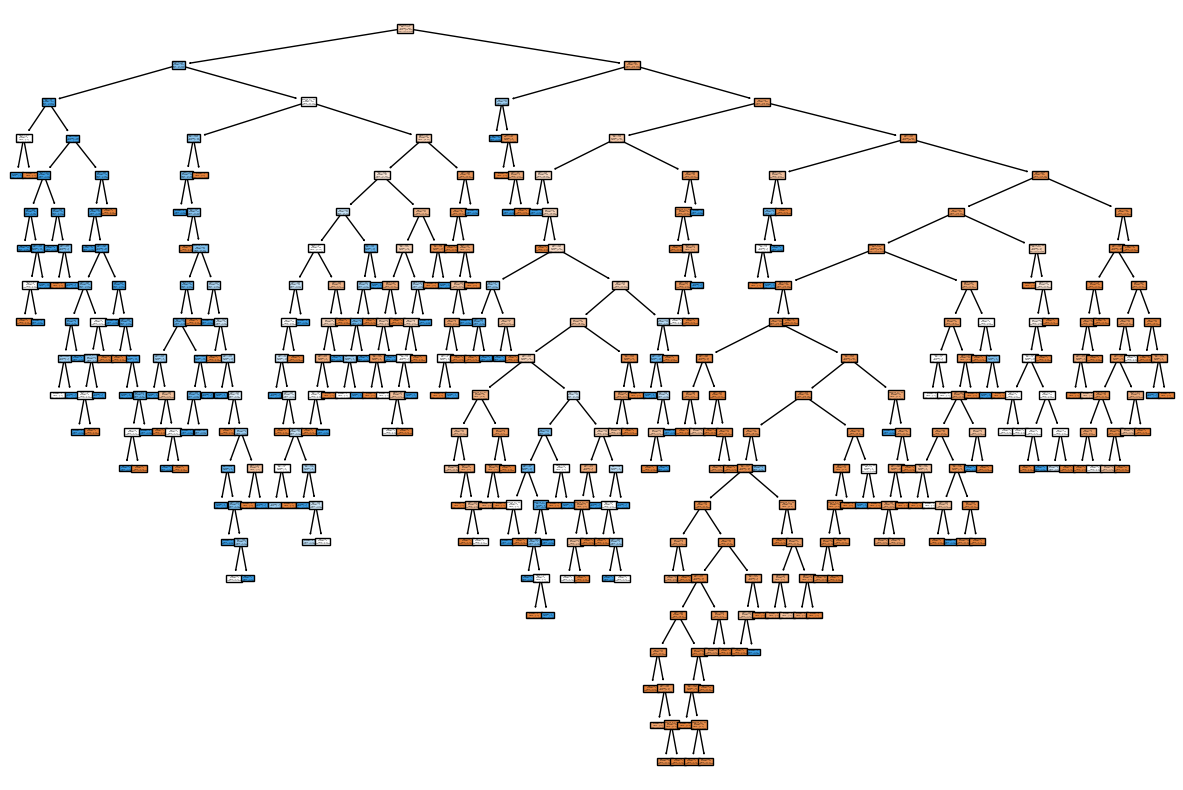

In [ ]:

# Een tree kan niet werken met str
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'])


# Split the data into features (X) and target variable (y)
X_train = train_data.drop(['Survived', 'Name','Fare','Ticket','PassengerId'], axis=1)
y_train = train_data['Survived']
X_test = test_data.drop(['Fare','Ticket','Name','PassengerId'],axis=1)


# Create the decision tree classifier and fit it to our training data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Visualize the decision tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(model,
                   feature_names=X_train.columns,
                   class_names=['Not Survived', 'Survived'],
                   filled=True)
plt.show()


# Random forest
Als je python vraagt verschillende 'bomen' te maken, dan heb je een forest.

Als je dan een geval invult, dan kijk je wat het meest voorkomt en dat is je voorspelling. Hierdoor neem je de info van de 100 modellen mee.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Selecting features and target
features = train_data.drop(['Survived', 'Name', 'PassengerId','Ticket'], axis=1).columns
target = 'Survived'

# Creating and training the model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf_model.fit(train_data[features], train_data[target])


RandomForestClassifier(max_depth=5, random_state=1)

In [ ]:
test_data['Survived'] = rf_model.predict(test_data[features])

# Creating a submission file
submission = test_data[['PassengerId', 'Survived']]
submission.to_csv('./submission.csv', index=False)

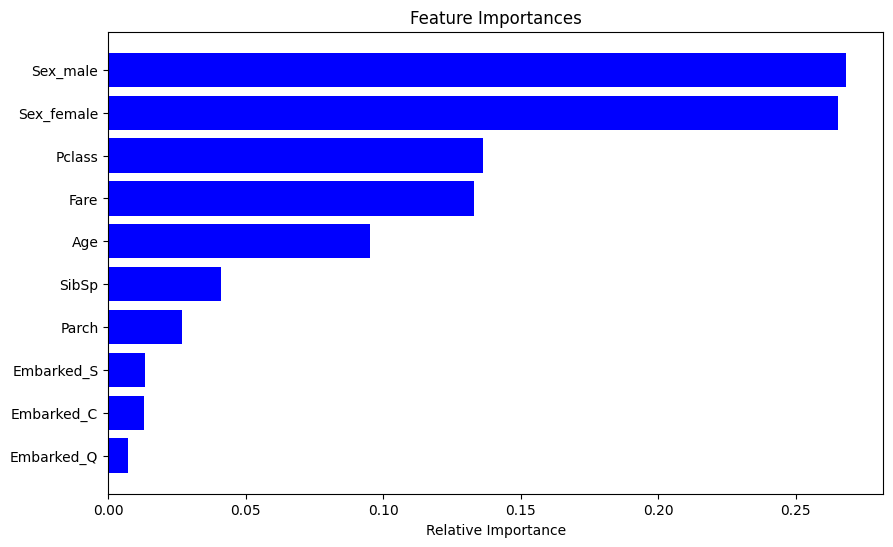

In [ ]:
import numpy as np
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
display(train_data['Survived'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

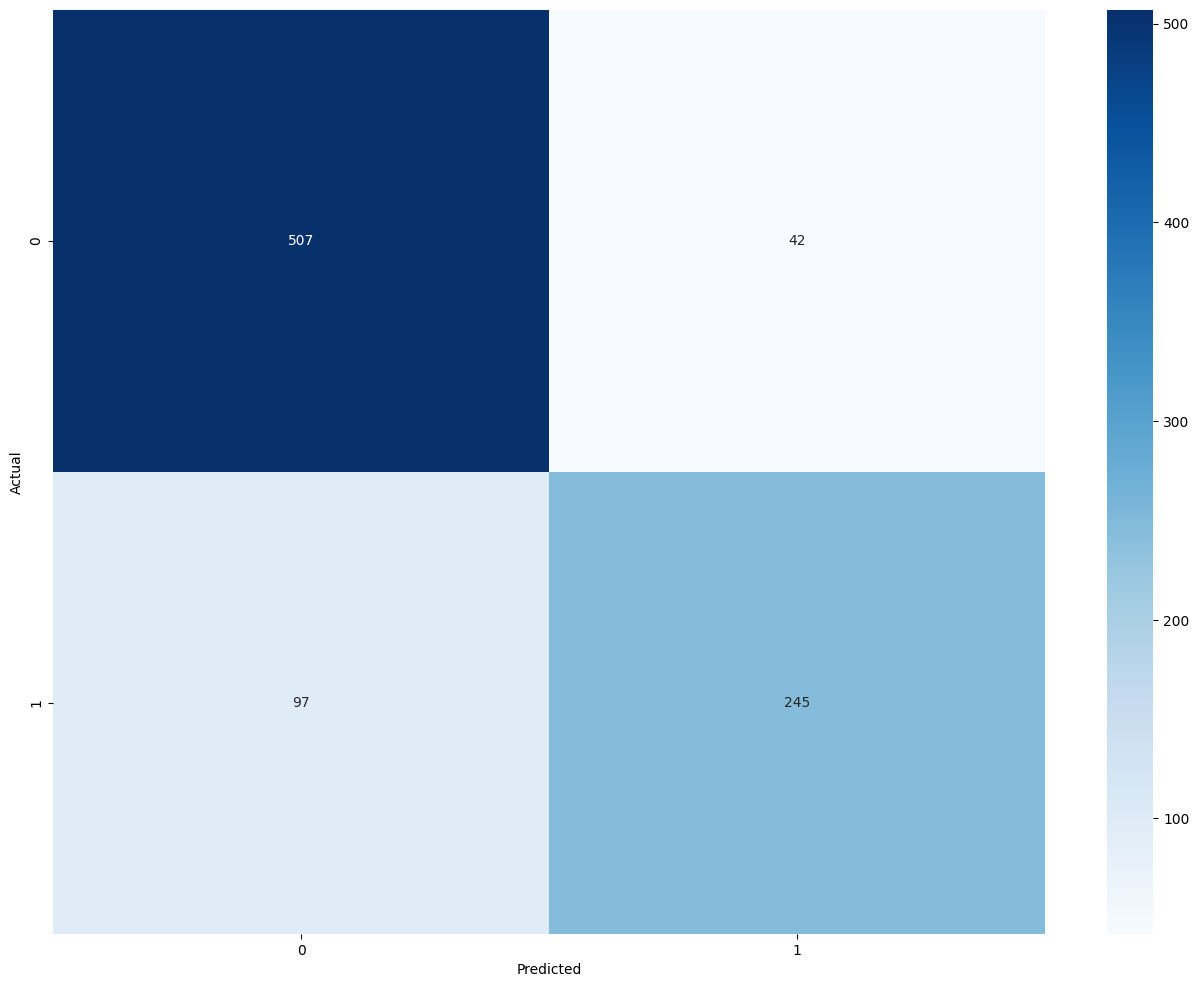

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_data['Predicted_survival'] = rf_model.predict(train_data[features])

y_test = train_data['Survived']
y_pred = train_data['Predicted_survival']
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
